# **변환 - 변환 및 회전**

이 과정에서 우리는 다음을 배울 것입니다:
1. 이미지 변환 수행
2. getRotationMatrix2D를 사용한 회전
3. 트랜스포스를 사용한 회전
4. 이미지 뒤집기

# **Transformations - Translations and Rotations**

In this lesson we'll learn to:
1. Perform Image Translations
2. Rotations with getRotationMatrix2D
3. Rotations with Transpose
4. Flipping Images

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
# 설정, 라이브러리 가져오기, Imshow 기능 만들기 및 이미지 다운로드
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!unzip -qq images.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=7df14eb9-2678-4fd8-9f81-b15a7bb9e75a
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 77.2MB/s]


### **번역**

이미지의 위치를 단순히 이동시키는 아핀 변환(왼쪽 또는 오른쪽)입니다.

우리는 이러한 변환을 구현하기 위해 cv2.warpAffine을 사용합니다.

'''cv2.warpAffine(이미지, T, (너비, 높이)'''

### **Translations**

This an affine transform that simply shifts the position of an image. (left or right).

We use cv2.warpAffine to implement these transformations.

```cv2.warpAffine(image, T, (width, height))```

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/warp.png)

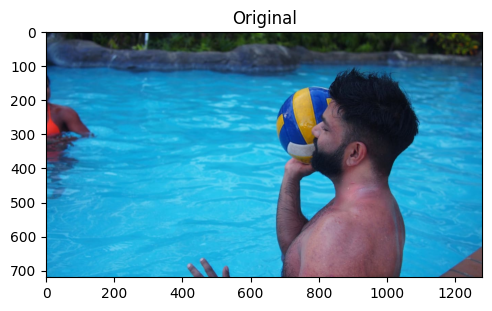

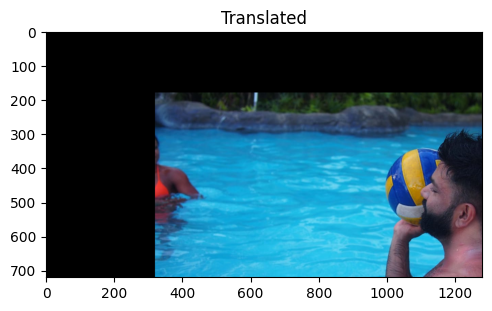

In [ ]:
# Load our image
image = cv2.imread('images/Volleyball.jpeg')
imshow("Original", image)

# Store height and width of the image
# 영상의 높이 및 너비 저장

height, width = image.shape[:2]

# We shift it by quarter of the height and width
# 높이와 너비의 4분의 1로 이동합니다
quarter_height, quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
# warpAffine을 사용하여 행렬 T를 사용하여 영상을 변환합니다
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [ ]:
# What does T look like
print(T)

print(height, width )

[[  1.   0. 320.]
 [  0.   1. 180.]]
720 1280


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


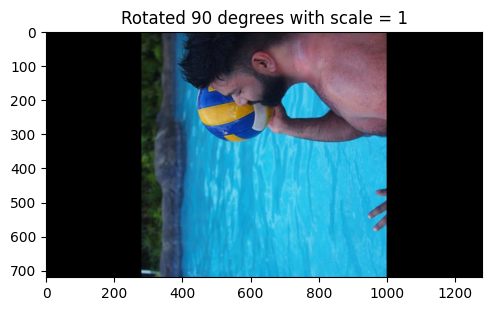

In [ ]:
# Load our image
image = cv2.imread('images/Volleyball.jpeg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

[[ 3.061617e-17  5.000000e-01  4.600000e+02]
 [-5.000000e-01  3.061617e-17  6.800000e+02]]


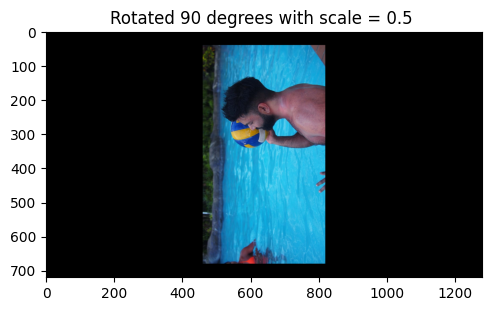

In [ ]:
# Divide by two to rototate the image around its centre
#  영상을 중심을 중심으로 회전시키기 위해 두 개로 나눕니다
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
# 이미지, 회전 매트릭스 및 원하는 최종 너비 및 높이를 입력합니다
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5 ", rotated_image)

In [ ]:
import numpy as np

# 주어진 회전 변환 행렬
rotation_matrix = np.array([[3.061617e-17, 5.000000e-01, 4.600000e+02],
                            [-5.000000e-01, 3.061617e-17, 6.800000e+02]])

# 회전 각도 계산
rotation_angle = np.arctan2(rotation_matrix[1, 0], rotation_matrix[0, 0])

# 각도를 라디안에서 도로 변환
rotation_angle_degrees = np.degrees(rotation_angle)

print("회전 각도:", rotation_angle_degrees)


회전 각도: -90.0


이미지를 둘러싼 모든 검은 공간에 주목하세요.

이제 이미지의 새 크기를 계산할 수 있으므로 이미지를 자를 수 있습니다(아직 자르기를 배우지 않았습니다!).

### **cv2.transpose**를 사용한 회전(유연성이 낮음)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)




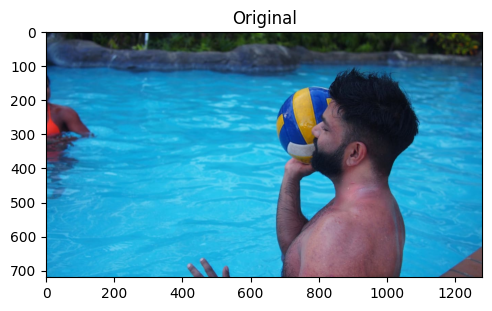

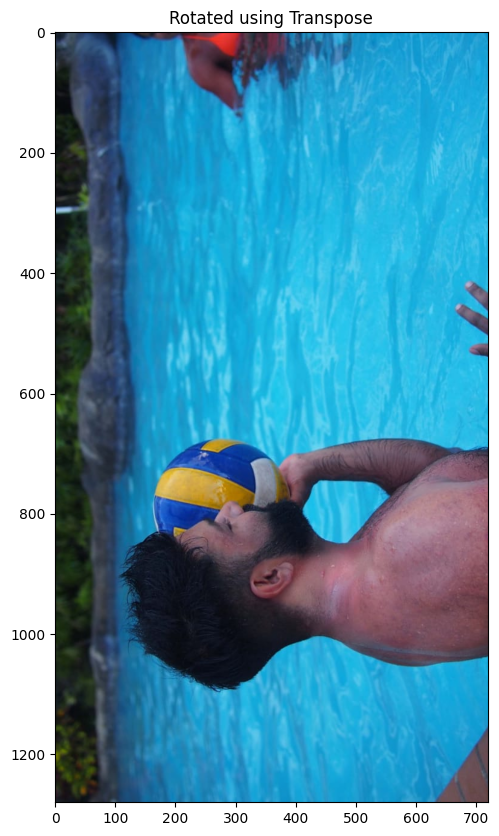

In [ ]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

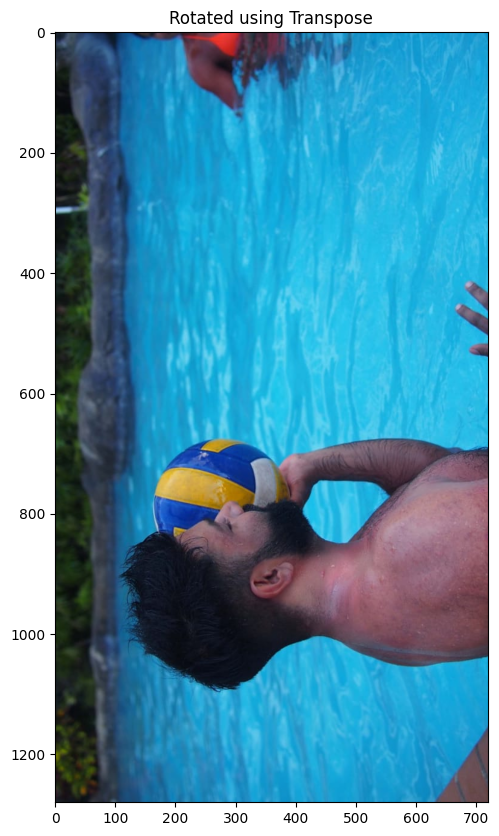

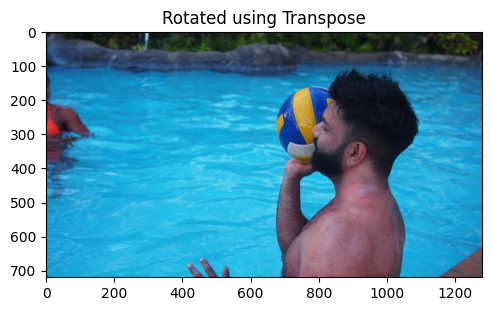

In [ ]:
rotated_image = cv2.transpose(image)
imshow("Rotated using Transpose", rotated_image)

rotated_image = cv2.transpose(rotated_image)
imshow("Rotated using Transpose", rotated_image)

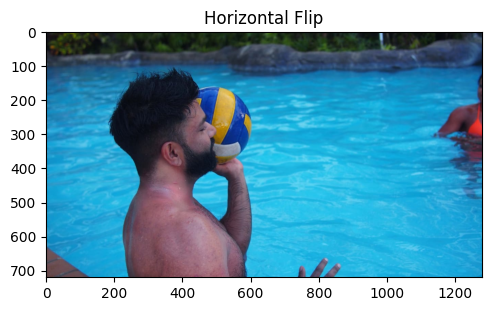

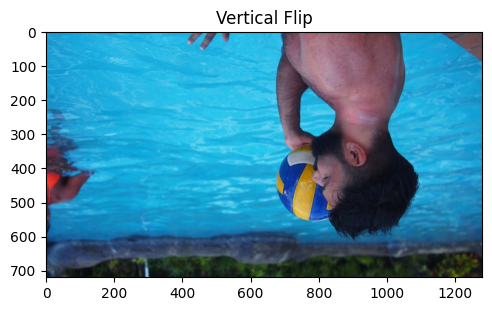

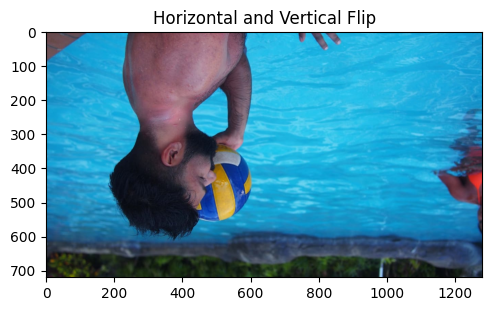

In [19]:
# 수평 방향으로 뒤집기
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)

# 수직 방향으로 뒤집기
flipped = cv2.flip(image, 0)
imshow("Vertical Flip", flipped)

# 수평 및 수직 방향으로 동시에 뒤집기
flipped = cv2.flip(image, -1)
imshow("Horizontal and Vertical Flip", flipped)
